----
# Prova Final - Cdados 2019.2
* **Aula 20** - Combinação de variavel 
* **Aula 21** - Teorema Central do Limite
* **Aula 23** - Teste de hipotese 
* **Aula 24** - T de student
* **Aula 25** - Regressão linear
----

In [2]:
# ------------ bibliotecas ------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

from scipy.stats import probplot, t, norm,uniform
from math import sqrt
%matplotlib inline

import statsmodels.api as sm

# --------------------- IMPORTANDO BIBLIOTECA ----------------------
%matplotlib inline
#!pip install mglearn
# !pip install pydotpus
# !pip install graphviz
# import pydotplus
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import mglearn 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import r2_score

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# -------------------------------------

ModuleNotFoundError: No module named 'mglearn'

----
# Combinações de variáveis aleatórias


Lembremos que:

Se $f(x)$ for uma função de densidade de probabilidade contínua

$\mu = E(X) = \int_{-\infty}^{\infty}x f(x) dx$

E que a variância:

$V(X) = \int_{-\infty}^{\infty}(x - \mu)^2f(x) dx$

E que ainda vale a propriedade:

$V(X) = E(X^2) - E(X)^2 = E(X^2) - \mu^2$

## Propriedades da esperança

Lembremos da aula 08 que, para o valor esperado ou esperança, vale, se $c$ e $d$ forem constantes:

$E(X+d) = E(X) + d$

$E(cX) = cE(X)$

Combinando as expressões acima:

$E(cX + d) = cE(X) + d$

E para a variância vale:

$V(X+d) = V(X)$

$V(cX) = c^2V(X)$

$V(cX + d) = c^2V(X)$

## Propriedades de combinações de variáveis aleatórias

### Propriedades da esperança

Sejam $a$ e $b$ constantes e $X$  e $Y$ variáveis aleatórias

$E(X + Y) = E(X) + E(Y)$

$E(aX + bY) = aE(X) + bE(Y)$

Estes resultados são sempre válidos, sejam $X$  e $Y$ dependentes ou independentes 

### Propriedades da variância

Sejam $X$  e $Y$ variáveis aleatórias

$V(X+Y) = V(X) + V(Y) + 2Cov(X,Y)$

$V(X-Y) = V(X) + V(Y) -2Cov(X,Y)$

Sendo que, como visto nas aulas de análise bidimensional, a covariância é definida como:


$Cov(X,Y) = E[(X-\mu_X))(Y-\mu_Y)] = E(XY) - \mu_X\mu_Y$

Dado que $\mu_X = E(X)$ e $\mu_Y = E(Y)$

### Variáveis independentes

$X$ e $Y$  independentes $\implies Cov(X,Y)=0$

Entretanto:

$Cov(X,Y) =0$ $\nRightarrow$ $X$ e $Y$  independentes

Se as variáveis $X$ e $Y$ forem independentes:

$V(X+Y) = V(X) + V(Y)$

$V(X-Y) = V(X) + V(Y)$


$E(X)E(Y) = \mu_X\mu_Y$


$Cov(X,Y) = E(XY) - \mu_X\mu_Y$


### Variância com coeficientes:

Sejam $a$ e $b$ constantes e $X$ e $Y$ variáveis aleatórias:

$V(aX + bY) = a^2 V(X) + b^2 V(Y) + 2ab Cov(X,Y)$

$V(aX - bY) = a^2 V(X) + b^2 V(Y) - 2ab Cov(X,Y)$

Se as variáveis $X$ e $Y$ forem independentes:

$V(aX+bY) = a^2V(X) + b^2V(Y)$

$V(aX-bY) = a^2V(X) + b^2V(Y)$


### Exemplo - soma de v.a

Um semicondutor tem 3 camadas. Supondo que as variâncias de espessura da primeira, segunda e terceira camada sejam 25, 40 e 30 $nm^2$, respectivamente, e que as espessuras sejam independentes, qual é o desvio padrão da espessura do produto final?

Sejam $X_1$, $X_2$ e $X_3$ as variáveis aleatórias que denotam as espessuras.

Então: 

$X = X_1 + X_2 + X_3$

Temos então que:

$V(X)=V(X_1)+V(X_2)+V(X_3) = 95 nm^2$

Consequentemente, o desvio padrão do produto final é: $9.747 nm$



### Média e variância de uma média

Seja $\overline{X} = (X_1 + X_2 + \cdots + X_n)/n$, com $E(X_i) = \mu$ para todo $i=1,2,\cdots, n$

Temos que $E(\overline{X}) = \mu$

Se $X_1, X_2, \cdots, X_n$ forem indepententes com  $V(X_i) = \sigma^2$ para todo $i=1,2,\cdots, n$, temos:

$V(\overline{X}) = \frac{\sigma^2}{n}$


## Propriedade reprodutiva da normal


Sejam $X_1, X_2, \cdots, X_n$   variáveis aleatórias normais com $E(X_i) = \mu_i$ e $V(X_i) = \sigma_i^2$, para $i=1,2,\cdots, n$

Então:

$Y = c_1X_1 + c_2X_2 + \cdots + c_nX_n$ **será uma variável aleatória normal**, com $E(Y)$ e $V(Y)$ definidos conforme

$$E(Y) = c_1\mu_1 + c_2\mu_2 + \cdots + c_n\mu_n$$

$$V(Y) = c_1^2\sigma_1^2 + c_2^2\sigma_2^2 + \cdots + c_n^2\sigma_n^2$$

---


##  RESUMO
## Esperança
* **Previsão teórica**
$$E(Z)=E(X+Y)=E(X)+E(Y)$$

### Variância 

* **Previsão teórica da variância**
$$Var(X+Y) = Var(X) + Var(Y) + 2 \cdot Cov(X,Y)$$



----
## Estatísticas e distribuições amostrais

Uma **estatística** é qualquer função baseada nas observações de uma amostra aleatória. Usamos estatísticas quando, para fins práticos, não é possível ter acesso a toda uma população.

A distribuição de probabilidades de uma estatística é chamada de *distribuição amostral*.

## Distribuição amostral da Média $\overline{X}$


Sejam:

$X_1, X_2, \ldots, X_n$ amostras aleatórias de $X$ de tamanho $n$, a distribuição de $\overline{X}$ é definida como:

$$\overline{X} = \frac{X_1 + X_2 + X_3 + \cdots + X_n}{n}$$

É chamada *Média Amostral*!

Pode-se caracterizar a distribuição amostral da média com os seguintes valores:

* Média de $\overline{X}$:

$$\mu_{\overline{X}} = E(\overline{X})=\frac{\mu + \mu + \cdots + \mu}{n} = \mu$$

* Variância de $\overline{X}$:


$$\sigma^2_{\overline{X}} = Var(\overline{X})=\frac{\sigma^2 + \sigma^2 + \cdots + \sigma^2}{n^2} = \frac{\sigma^2}{n}$$

## Teorema  Central do Limite

Se $X_1, X_2, \cdots, X_n$ é uma amostra aleatória de tamanho $n$ extraída de uma população com média $\mu$ e variância $\sigma^2$ e $\overline{X}$ é a distribuição da média amostral, a forma limite da distribuição:

$$Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{n}}$$

é a **distribuição normal padrão**, à medida que $n  \rightarrow \infty$.

---

In [ ]:
# AULA TLC 
#CDF: QUEREMOS A PROBABILIDADE
#PPF: queremos o ponto 


---
# Fórmulas:
* **Esperança**:

* **Variância esperada**:
$$Var(Ax+by)=a^2V(x)+b^2V(y)+2abCov(X,Y)$$


*  **Fórmula de padronização da normal de uma distribuição amostral**

    $$Z = \frac{(\bar{X}-u)}{\frac{desviopadrão}{n^(1/2)}}$$
    * Gama seria a certeza que queremos 
    * o Z seria os dois pontos que cerca a média 
        * $-Z_(\frac{gama}{2})$ e $ponto +Z_(\frac{gama}{2})$
         * em que $z_{\gamma/2}$ é o valor $z$ na normal padrão que delimita de forma simétrica a probabilidade $\gamma$ em torno da média
    * Achamos a -Zgama/2 = norm.ppf(0.5-gama/2)
    * Achamos a +Zgama/2 = norm.ppf(0.5+gama/2)
    * $n = \left( z_{\gamma/2} \cdot \frac{\sigma}{d}\right)^2$
        * sendo n o numero de elementos
    * (ultimo ex da aps)
---

In [ ]:
"""ULTIMA QUESTAO DA APS 
informações do ex:
1. Não podemos errar mais de 12MPa
2. Vai ser necessário fazer um ensaio de tração
em  um  certo número de barras 

Você conhece o desvio padrão da produção, que é de $36MPa$. Note que $1Pa=1N/m_2$.

Quantos elementos n você vai precisar incluir na sua amostra de ensaio para garantir que a média X_barra se encontre a menos 
de 6MPa da média verdadeira da produção em 97% das vezes

Não sabemos a media e queremos estimar
"""
z = norm.ppf(0.5-(0.97/2))
n = (z*(36/6))**2
print("Numero de elementos que devem ser incluidos: ",n)

---
# Encontrando $\hat{\beta_{1}}$ e $\hat{\beta_{0}}$
## Fórmulas:
* $\hat{\beta_{0}}$:
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_1} \bar{x}$$

* $\hat{\beta_{1}}$:

$$\hat{\beta_1}= \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})^2} = \frac{S_{xy}}{S_{xx}} $$

Fórmula alternativa que pode ser útil:


$$\hat{\beta}_1 = \frac{Cov(X,Y)}{Var(X)}$$


* $SS_E$ 
    * (SQRes) A soma dos quadrados dos resíduos
$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$


* $SQT$
    * Também chamado de $SS_T$ no livro, que é a **soma dos quadrados totais**:
$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$

* $R^2$
$$ R^2 = 1 - \frac{SS_E}{SS_T} = \frac{SS_R}{SS_T}$$



---

In [ ]:
#Caso tenha duas listas transformar em um array pra fazer calculos futuros
valor_x = [1, 51, 13, 41,21,123]
valor_y = [1, 51, 13, 41,21,123]

x = np.array(valor_x)
y = np.array(valor_y)

x_ = np.mean(x)
y_ = np.mean(y)

In [ ]:
Sxy = np.sum((x - x_)*(y - y_)) # note que as operações são feitas em cada elemento dos arrays x e y
Sxx = np.sum((x-x_)**2)
beta_1 = Sxy/Sxx
beta_zero = y_ - beta_1
print("Valor de Beta1: ",beta_1)
print("Valor de Beta0: ",beta_zero)

In [ ]:
# SSE = reg.ssr #lembrando que reg seria uma variavel definida da função que faz a regressão
# print("Valor do SSE: ",SSE)
# SQT = np.sum((y-y_)**2)
# print("Valor SQT: ",SQT)

## APS6

---
# Fazendo uma regressão linear Parte1 

---

In [ ]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

reg = regress(x, y) # DESCOMENTE a linha para funcionar
reg.summary() # DESCOMENTE a linha

In [ ]:
beta0s = reg.params[0] # como acessar o beta 0 calculado
beta1s = reg.params[1] # como acessar o beta 1 e assim por diante
print("Betas do Statsmodels - Beta 0: {:}   Beta 1 {:}:".format(beta0s, beta1s))

---
# Fazendo Regressão Linear parte: 2  - sklearn

---

In [ ]:
# Criar a base de treinamento e teste
from sklearn.model_selection import train_test_split
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

In [ ]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(X_train,Y_train)
# y_predict = model.predict(X_test)

---
# Como analisar a regressão linear 
* *$R^2$:* Este valor é uma medida de ajustamento de um modelo estatístico linear generalizado varia entre 0 e 1, indicando, em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior o R², mais explicativo é o modelo, melhor ele se ajusta à amostra.
* **Coef:** são os coeficientes da regressão linear, o **coef constantes** é const
* **Pvalue:** Este valor varia de 0 a 1, quanto mais proximo do 0 mais correlacionado são os dados
* **F-statistic:** Seria uma junção dos Pvalue, analisa todos os Pvalue, ou seja, ele da a probabilidade dos coeficientes serem encontrados como ß1...ßn mas na realidade não era para existir
    * **Este varia de 0 a 1**: quanto mais perto do um, menos correlacionados são os dados, estes betas não deveriam existir
    * **Testa as seguintes hipóteses**:
        * H0:β1=β2=…=βp=0
        * H1:βi≠0 para no mínimo algum  i, com  i=1,…,n
 
    * A rejeição da hipótese nula implica que no mínimo uma variável explicativa (regressora) contruibui significantemente para o modelo. Esse teste F é mais útil no caso de modelo de regressão múltipla.
* **Durbin-Watson:** é utilizado para detectar a presença de autocorrelação (dependência) nos resíduos de uma análise de regressão. Ele varia de 0 a 4, sendo que de 0 a 2 indica que há uma autocorrelação positiva e de 2 a 4 indica uma autocorrelação negativa. 
    * Um valor próximo de  2 sugere que não há autocorrelação dos resíduos
    * Um valor menor que  2 sugere correlação positiva dois resíduos
    * Um valor maior que  2 sugere correlação negativa dois resíduos
* **Omnibus:** testa a normalidade dos residuos
* **Prob(Omnibus):** for muito baixo, existe evidência de que os resíduos não são distribuídos normalmente, violando nesse caso a suposição do modelo de regressão.
    * Caso o enunciado não dizer nada, se a probabilidade de ombibus for maior que 5% já podemos concluir que segue uma distribuição normal
* **JB**: testa a normalidade dos residuos
* **Prob(JB):** for muito baixo, existe evidência de que os resíduos não são distribuídos normalmente, violando nesse caso a suposição do modelo de regressão.

**obs:** Gabarito aula 25 regressão linear simples explica os testes

---

---
# Teste de hipotese 
* Fazemos com o parâmetro populacional e não a média amostral

---
# Erro tipo 1 e tipo 2
|       |H0 é verdadeiro|H0 é falso|
|:---|:-----|:-----|
|Rejeito H0| Erro tipo 1,Falso Positivo eProbabilidade 𝛼|Decisão correta|  
|Não rejeito H0|Decisão correta| Erro tipo 2, Falso Negativo e Probabilidade 𝛽|

* alpha é a probabilidade de H0 ser verdadeira, e rejeitarmos
* beta é a probabilidade de H1 não ser verdadeira e esta nao ser rejeitada

---
Nível de significância (alpha) - tolerância a probabilidades extremas. 
	
    • O alpha se divide pela metade quando a anomalia está acima ou abaixo. 
	
    • Ppf(alpha, loc=media, scale = desvpad/raiz de n)
		
        ○ Para descobrir o valor da outra extremidade, pode se lembrar que os valores são simétricos e que a distância até a média é a mesma para os dois lados. 
        
Teste de hipótese:

	• Hipótese nula - é algo certeiro; não algo de extraordinário. 
		○ Exame não ser confirmado. 
		○ Nesse caso NUNCA há algo de inesperado. 
	• Hipótese alternativa - (H1) - efeito a ser testado. Há algo de errado ou o teste saiu “positivo”. 
	• 

Passo 2:

Qual a estatística? Lembrando que estatística é algo determinado partindo de um conjunto de amostras.  

Utilização das médias amostrais  

Passo 3:

Definir o nível de significância e região crítica. 

RC={X<Xc1 ou X>Xc2}
    
XC1 e XC2 são os pontos médios críticos. 

Passo 4:

Estatística da amostra (média dos valores)

Passo 5:
Verificar se a amostra pertence à região crítica.

Você pode aceitar ou negar Ho(hipótese nula)


  
Valor p: probabilidade da amostra encontrada ou um valor mais extremo
	• Quando é bicaudal
		○ 2(1-norm.cdf blabla) para calcular região que você não quer (região crítica)
	• Se utiliza o alpha para comparar o valor P e então ACEITAR ou REJEITAR a hipótese nula. 
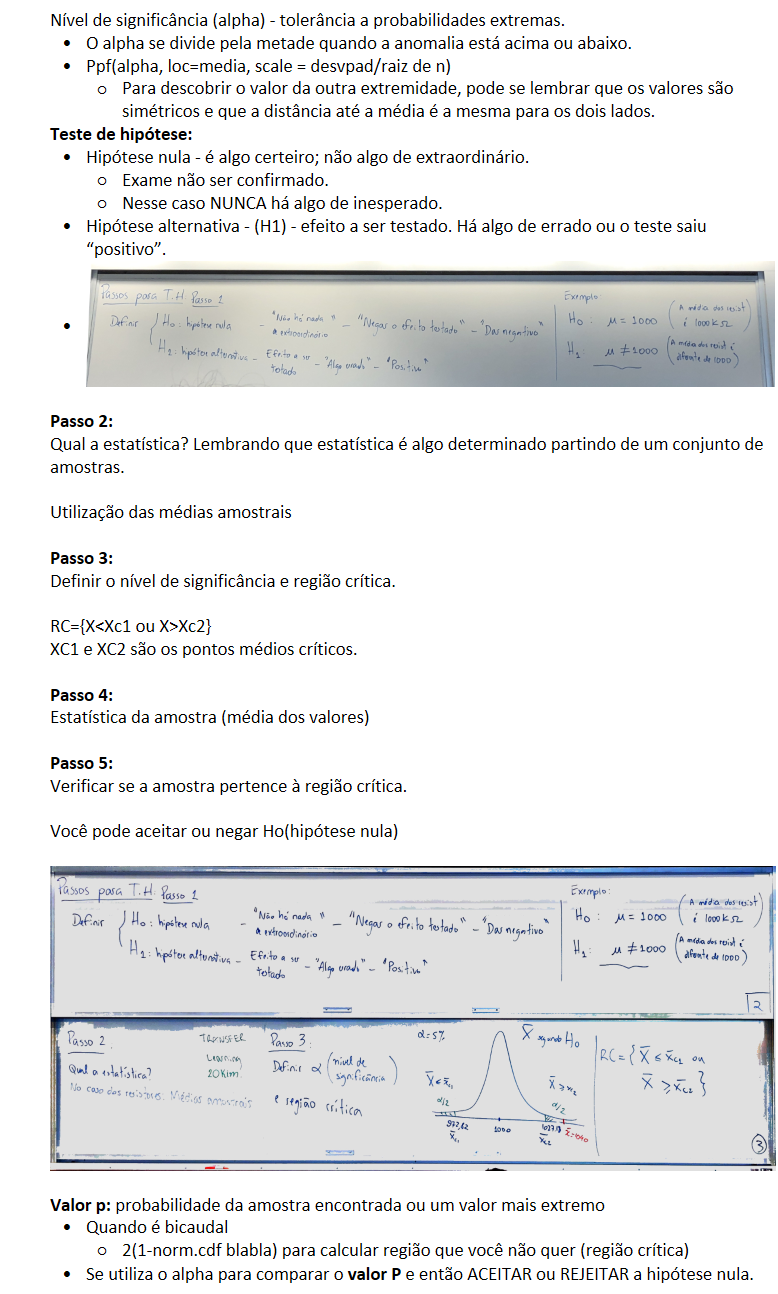

# Teste de hipotese para uma média populacional 
* variância populacional conhecida:
    * Unicaudal à direita:
        * Região crítica: Rejeita-se H para qualquer média amostral $\bar{x}obs>\bar{x}critico$
    * Unicaudal à esquerda:
        * Região crítica: Rejeita-se H para qualquer média amostral $\bar{x}obs<\bar{x}critico$
    * Bicaudal:
        * Região crítica: Rejeita-se H para qualquer média amostral $\bar{x}obs<\bar{x}critico1$ e para $\bar{x}obs>\bar{x}critico2$
        
---

In [ ]:
# ver aula 23 ex 4 caso n esteja dando certo
"""
C. Se a verdadeira média é 3,3 s.m., qual a probabilidade de se tomar uma decisão errada sob H1?
Atenção para o erro  β: Nestes casos o exercício sempre precisa fornecer um  μ1
alternativo que vai ser assumido como a verdade quando  H0 é falso
O exercício em questão nos avisa que, quando  H0 é falso, então vale que  μ=μ1=3.3
"""
norm.cdf(3.162844351182859, loc=3.3, scale=.7/10)# item c

----
# Tstudent e teste normal diferença
* $sigma^2$ desconheicodo X (população) normal -- T Student
* $sigma^2$ conhecido - teste normal
* Grau de liberdade
    * grau de liberdade = tamanho_amostra - 1
* ddof = 1 

# Passos para Construção de um teste de hipóteses (via Região Crítica)
* **1o.Passo**: Fixe qual a hipótese nula, H0, a ser testada e qual a hipótese alternativa (HA).
* **2o.Passo**: Use a teoria estatística e as informações disponíveis para decidir qual estatística de teste será usada sob H0. Não se esqueça de levantar as propriedades dessa estatística.
* **3o.Passo**: Fixe a probabilidade a de cometer erro de rejeitar H0, sob H0 verdadeiro, e use este valor para construir a região crítica RC. Lembre que esta região é construída para a estatística definida no segundo passo, usando o valor hipotetizado em H0.
* **4o.Passo**: Use as informações fornecidas pela amostra para encontrar o valor observado da estatística de teste.
* **5o.Passo**: Se o valor observado da estatística de teste pertencer à região, crítica rejeite H0; caso contrário, não rejeite.
---

In [ ]:
#--------------- EXEMPLO ---------------
#Dados
amostra=(65,70,76,86,59,81,75,72,81,83)

n=len(amostra)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
x_obs_barra=np.mean(amostra)
devio_padrao=np.std(amostra, ddof=1)

print("Tamanho da amostral: n=", n)
print("Média amostral observada: x_obs=", x_obs)
print("Desvio padrão amostral observada: s=", s)

alpha=0.05 #nível de significância fixado para o teste
media_da_hipotese_0=80 #sob a hipótese nula

#Exemplo de 

In [ ]:
#Decisão Via Região Crítica: UNICAUDAL a esquerda
t_obs=(x_obs_barra-media_da_hipotese_0)/(devio_padrao/np.sqrt(n))

t_c=stats.t.ppf(alpha, df=n-1) #valor crítico na cauda a esquerda

print("t_obs=",t_obs)
print("t_c=",t_c)

print("\nRegra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!!\n")
print("RC={t_obs<", t_c,"}\n")
print("Conclusão: Como t_obs pertence a RC, então há evidências de que desconfiança procede, com 95% de confiança!!")

In [ ]:
#Decisão Via Valor-p: UNICAUDAL a esquerda
t_obs=(x_obs_barra-media_da_hipotese_0)/(devio_padrao/np.sqrt(n))

valor_p=stats.t.cdf(t_obs, df=n-1) 

print("𝛼 =",alpha)
print("Valor-p=",valor_p)

print("\nRegra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!!\n")

print("Conclusão: Como nos resultados acima vemos que valor-p < 𝛼, então há evidências de que desconfiança procede, com 95% de confiança!!")

In [ ]:
x_critico = t.ppf(0.05, loc=80, scale=s/sqrt(n), df=n-1)
x_critico

# Fazer gráfico da normal

In [ ]:
# PLOTANDO UMA NORMAL
mu_fake = 15
n = 16
sigma = 4
sigma_x_=sigma/sqrt(n)
x_critico = 18

ax = plt.subplot(111)
x = np.linspace(10,20,300)
y = norm.pdf(x, loc=mu_fake, scale=sigma_x_)
plt.plot(x,y)
plot_fill = plt.fill_between(x,y, where=x>x_critico, color="red")
plot_fill.set_label("região de rejeição definida por $x_{critico}$ e $\\alpha$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

---
# Socrative
# Pergunta 1

* $E_X1 = 5$
* $V_Z1 = 100$
* $Antes = Y = X1+X2$
* $depois = W =2X1 $
* $E(Y) = E(X1)+E(X2) = 10$ 
* $Var(Y) = Var(X1)+ Var(X2) = 200$
* $E(W) = E(2X1) = 2E(X1)$
* $V(W) = 4Var(X1) = 400$

* Logo a Variabilidade aumenta e não mudaria o processo

---




---
# Matriz de confusão
* Matriz pra acurácia de um classificador 

---

# RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
reg = RandomForestRegressor(max_depth=4, n_estimators=50)
